# STOCK PREDICTION 😎

### Importing Essential Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

### Importing Dataset

In [4]:
tesla = pd.read_csv("TESLA.csv",index_col=['Date'], parse_dates=['Date'])
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200


#### isolating the close column

In [5]:
tesla_series = tesla['Close']
tesla_series

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

#### plotting the close data

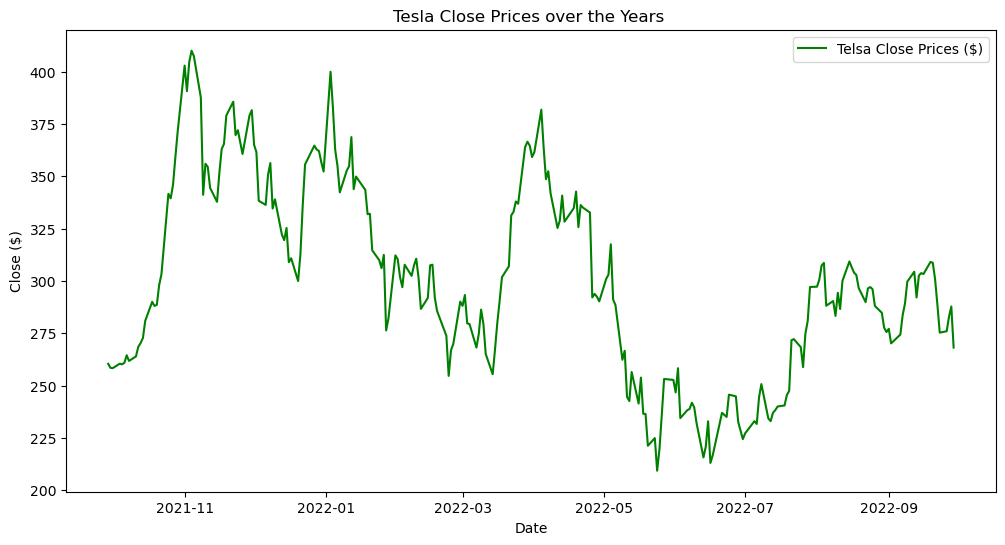

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_series.index, tesla_series, label='Telsa Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years ')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [7]:
mean_tesla_close = tesla_series.mean()
std_deviation = tesla_series.std()
print(mean_tesla_close)
print(std_deviation)

299.70910395652174
45.788282709532616


### Creating a 5 day Rolling Average

In [8]:
rolling_mean = tesla_series.rolling(window=5).mean()

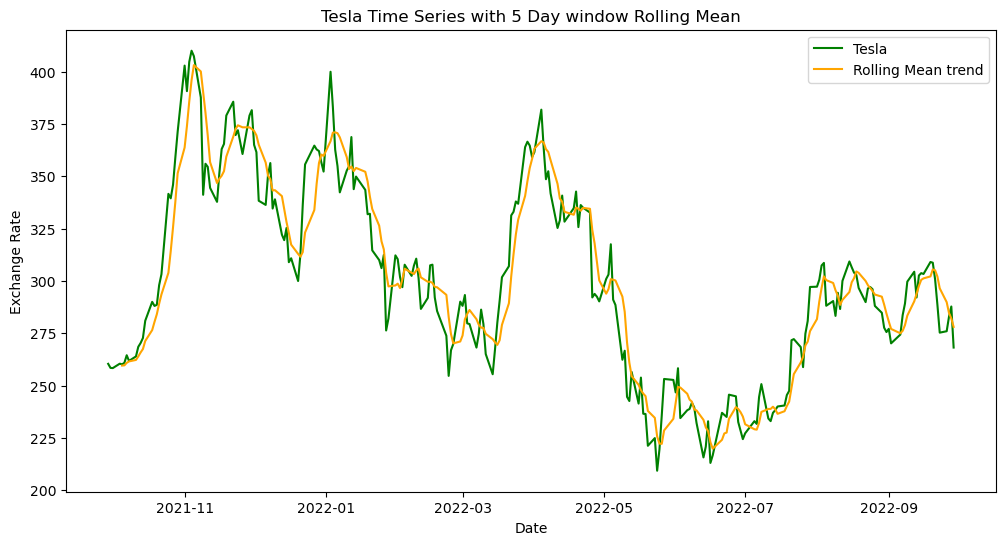

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_series.index, tesla_series, label='Tesla', color='green')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean trend', color='orange')
plt.title('Tesla Time Series with 5 Day window Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Time Series with Keras 

In [11]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = MinMaxScaler()
tesla_series1= scaler.fit_transform(tesla_series1)

# Split the data into training and testing sets
train_size = int(len(tesla_series1) * 0.80)
test_size = len(tesla_series1) - train_size
train_data, test_data = tesla_series1[0:train_size], tesla_series1[train_size:len(tesla_series1)]

# Create sequences for time series forecasting
def create_sequences(tesla_series1, look_back):
    X, y = [], []
    for i in range(len(tesla_series1) - look_back):
        X.append(tesla_series1[i:(i+look_back), 0])
        y.append(tesla_series1[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")



D:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.2455
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1456
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0427
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0432
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0250
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0281
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0245
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0211 
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207
Epoch 11/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0185
Epoch 12/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196
Epoch 13/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192
Epoch 14/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0186
Epoch 15/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0168
Epoc

In [10]:
tesla_series1 = tesla[['Close']]
tesla_series1

,Close
Date,
2021-09-29,260.436676
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


#### Graphing the Keras Model

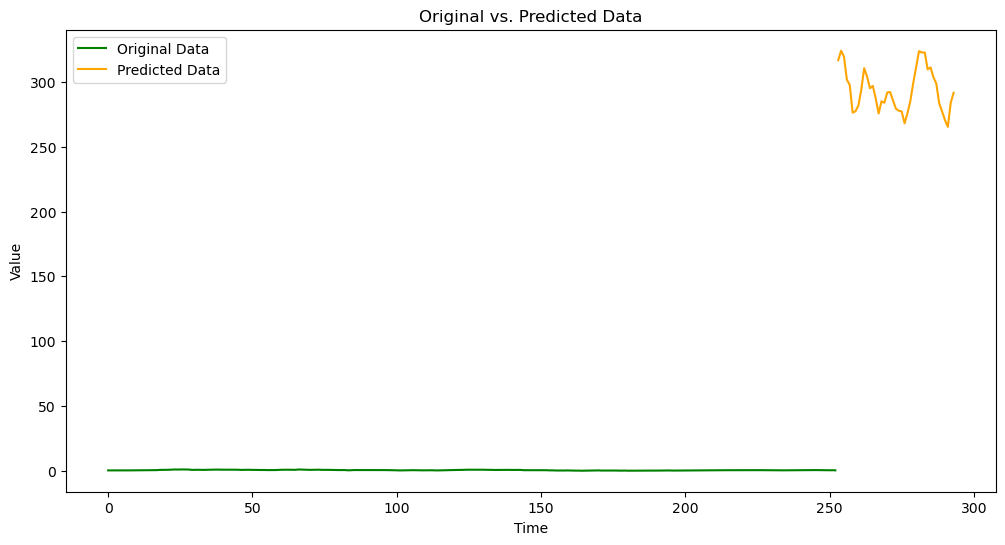

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(tesla_series1)), tesla_series1, label='Original Data', color='green')
plt.plot(np.arange(len(tesla_series1), len(tesla_series1) + len(test_predict)), test_predict, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Predicting future prices 

In [13]:
tesla_preds= tesla['Close']
tesla_preds

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

In [14]:
log_returns_tesla = np.log(1+ tesla_preds.pct_change())
log_returns_tesla.tail()

Date
2022-09-23   -0.047037
2022-09-26    0.002467
2022-09-27    0.024798
2022-09-28    0.017066
2022-09-29   -0.070530
Name: Close, dtype: float64

In [15]:
u = log_returns_tesla.mean()
var = log_returns_tesla.var()
print(u)
print(var)

0.00011670824180026695
0.0016524670034425227


In [16]:
stdev = log_returns_tesla.std()
stdev

0.040650547394131396

In [17]:
drift = u -(0.5 * var) 
drift

-0.0007095252599209944

In [18]:
np.array(drift)

array(-0.00070953)

In [19]:
norm.ppf(0.95)

1.6448536269514722

In [20]:
x = np.random.rand(10,2)
x

array([[0.03110442, 0.01704731],
       [0.14006066, 0.69292456],
       [0.5486062 , 0.18882496],
       [0.57221269, 0.46940111],
       [0.65041646, 0.53814035],
       [0.29984688, 0.98409727],
       [0.52740787, 0.20454739],
       [0.84049633, 0.75599564],
       [0.32331243, 0.3619291 ],
       [0.55248105, 0.20855361]])

In [21]:
norm.ppf(x)

array([[-1.8648043 , -2.11895081],
       [-1.08004685,  0.50415726],
       [ 0.12214069, -0.88223466],
       [ 0.18201033, -0.0767754 ],
       [ 0.38644508,  0.09574977],
       [-0.52484094,  2.14684703],
       [ 0.06875547, -0.82548768],
       [ 0.99649986,  0.69347946],
       [-0.45845601, -0.35330713],
       [ 0.13193222, -0.81145012]])

In [22]:
t_intervals = 365 
iterations = 5 

In [23]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00678563, 0.97633779, 0.96692581, 1.00895971, 0.97026328],
       [1.02757149, 1.05931856, 0.95865503, 1.05976532, 1.00495422],
       [0.96420778, 0.98790121, 1.07167932, 0.96694772, 0.98437053],
       ...,
       [0.95551227, 0.99319781, 0.97426172, 1.01009536, 1.00105459],
       [1.03493442, 0.96895058, 0.96432667, 1.01814777, 0.95087812],
       [1.05379453, 1.0404391 , 1.04180433, 0.94184395, 0.9164246 ]])

In [24]:
S0 = tesla_preds.iloc[-1]
S0

268.209991

In [25]:
prices_list= np.zeros_like(daily_returns) 
prices_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
prices_list[0] = S0
prices_list


array([[268.209991, 268.209991, 268.209991, 268.209991, 268.209991],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       ...,
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ]])

In [27]:
for t  in range(1, t_intervals): 
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[268.209991  , 268.209991  , 268.209991  , 268.209991  ,
        268.209991  ],
       [275.60494104, 284.11982042, 257.12085676, 284.23964599,
        269.53876113],
       [265.74042942, 280.68231538, 275.55110552, 274.84487767,
        265.32601254],
       ...,
       [147.33178203, 108.5676437 , 113.94350136, 234.01885927,
         64.84241444],
       [152.47873167, 105.19668178, 109.87875705, 238.26578007,
         61.65723326],
       [160.68125374, 109.45074135, 114.47216437, 224.40918402,
         56.5042055 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


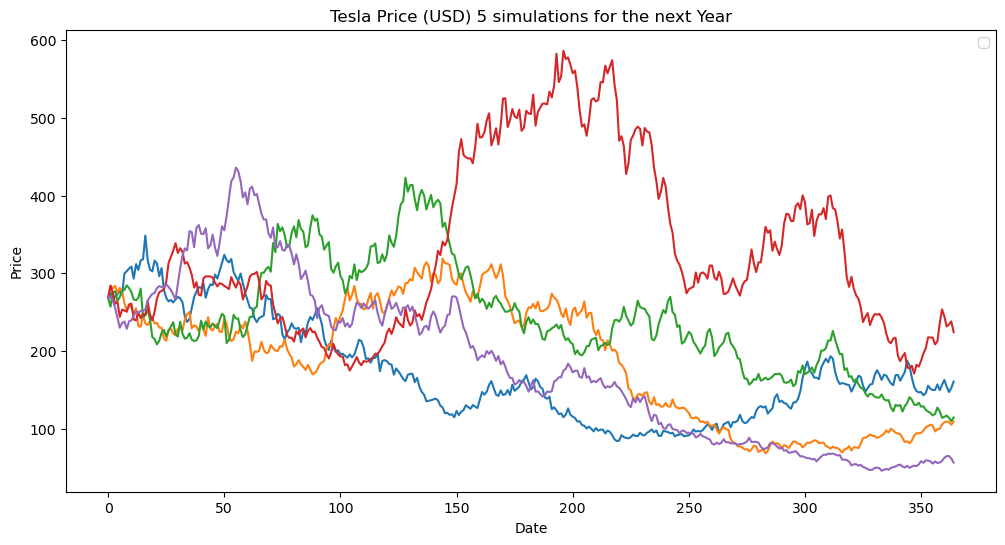

In [28]:
plt.figure(figsize=(12,6))
plt.plot(prices_list)
plt.title('Tesla Price (USD) 5 simulations for the next Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()